In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
folder_path = os.path.join(os.getcwd(), "time data")
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

for file, df in dataframes.items():
    print(f"\n--- First 5 rows of {file} ---")
    print(df.head())


--- First 5 rows of Real_Estate_(Base_Data).csv ---
   RecordID_Int ParcelNumber StreetNumber   StreetName Unit  \
0             1    010001000         1117   EMMET ST N  NaN   
1             2    010001100      1035-67  MILLMONT ST  NaN   
2             3    010001200         1159  MILLMONT ST  NaN   
3             4    010001300      1135-37  MILLMONT ST  NaN   
4             5    010001400         1111  MILLMONT ST  NaN   

                     StateCode  TaxType   Zone  TaxDist  \
0  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
1  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
2  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
3  4.0 Commercial & Industrial  Taxable  NX-10      NaN   
4  4.0 Commercial & Industrial  Taxable  NX-10      NaN   

                                        Legal  Acreage   GPIN  
0  39.832 ACRES BARRACKS ROAD SHOPPING CENTER    39.83   1326  
1                           PARCEL W WEST BAR     2.14  15071  
2                    

In [3]:
merged_df = None

for file, df in dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on="ParcelNumber", how="inner")  # Inner join


merged_df.to_csv("merged_data.csv", index=False)
merged_df.head()

,RecordID_Int_x,ParcelNumber,StreetNumber_x,StreetName_x,Unit_x,StateCode,TaxType,Zone,TaxDist,Legal,...,ExternalWalls,NumberOfStories,SquareFootageFinishedLiving,RecordID_Int,SaleDate,SaleAmount,StreetName,StreetNumber,Unit,BookPage
0,7,010001600,600,MASSIE RD,NaN,7.6 Exempt Educational,Exempt,CM,NaN,80 AC JAG SCHOOL,...,Wood,2.00,3672.0,28,1900/01/01 05:00:00+00,0,MASSIE RD,600,NaN,0:0
1,15,010005000,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,...,NaN,NaN,NaN,64,2024/06/28 04:00:00+00,581500,BARRACKS RD,2030,NaN,2024:1553
2,15,010005000,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,...,NaN,NaN,NaN,65,1993/02/18 05:00:00+00,0,BARRACKS RD,2030,NaN,651:842
3,15,010005000,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,...,NaN,NaN,NaN,66,1993/02/18 05:00:00+00,0,BARRACKS RD,2030,NaN,651:842
4,16,010006000,2028,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOTS 9 & 10 BK 10 RUGBY,...,Brick Veneer,2.00,2786.0,67,2023/12/15 05:00:00+00,1305000,BARRACKS RD,2028,NaN,2023:2799


In [4]:
merged_df.columns.tolist()

['RecordID_Int_x',
 'ParcelNumber',
 'StreetNumber_x',
 'StreetName_x',
 'Unit_x',
 'StateCode',
 'TaxType',
 'Zone',
 'TaxDist',
 'Legal',
 'Acreage',
 'GPIN',
 'RecordID_Int_y',
 'StreetNumber_y',
 'StreetName_y',
 'Unit_y',
 'UseCode',
 'Style',
 'Grade',
 'Roof',
 'Flooring',
 'Heating',
 'Fireplace',
 'YearBuilt',
 'TotalRooms',
 'Bedrooms',
 'HalfBathrooms',
 'FullBathrooms',
 'BasementGarage',
 'Basement',
 'FinishedBasement',
 'BasementType',
 'ExternalWalls',
 'NumberOfStories',
 'SquareFootageFinishedLiving',
 'RecordID_Int',
 'SaleDate',
 'SaleAmount',
 'StreetName',
 'StreetNumber',
 'Unit',
 'BookPage']

In [5]:
columns_to_keep = ['ParcelNumber','SaleAmount', 'SaleDate','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade']
merged_df = merged_df[[col for col in columns_to_keep if col in merged_df.columns]]
merged_df.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade
0,010001600,0,1900/01/01 05:00:00+00,4,1920.0,3672.0,A
1,010005000,581500,2024/06/28 04:00:00+00,NaN,NaN,NaN,NaN
2,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
3,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
4,010006000,1305000,2023/12/15 05:00:00+00,5,1940.0,2786.0,A


In [6]:
merged_df = merged_df.dropna()
merged_df_clean = merged_df[merged_df["SaleAmount"] != 0]
merged_df_clean.to_csv("merged_data_clean.csv", index=False)
merged_df_clean = merged_df_clean[merged_df_clean.apply(lambda row: 'No dat' not in row.values, axis=1)]
merged_df_clean = merged_df_clean[merged_df_clean['Bedrooms'] != '2215']
merged_df_clean['Bedrooms'] = pd.to_numeric(merged_df_clean['Bedrooms'], errors='coerce').astype('Int64')
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] >= 1950]
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] <= 2025]
merged_df_clean.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade
14,010010000,575000,2018/10/31 04:00:00+00,4,1950.0,2144.0,B++
15,010011000,205000,1984/05/16 04:00:00+00,6,1954.0,3392.0,B +
16,010011000,970000,2018/01/10 05:00:00+00,6,1954.0,3392.0,B +
17,010012000,785000,2020/06/26 04:00:00+00,3,1952.0,2520.0,B++
18,010012000,512000,2015/05/04 04:00:00+00,3,1952.0,2520.0,B++


In [7]:
merged_df_clean['Bedrooms'].unique()

<IntegerArray>
[4, 6, 3, 2, 7, 5, 1, 8, 10, 0, 12, 9]
Length: 12, dtype: Int64

In [8]:
merged_df_clean['Grade'].unique()

array(['B++', 'B +', 'A -', 'A', 'C', 'B', 'B -', 'C++', 'C +', 'A +',
       'D', 'C -', 'A++', 'D +', 'D -', 'E'], dtype=object)

In [9]:
merged_df_clean['YearBuilt'].unique()

array([1950., 1954., 1952., 1958., 2002., 1951., 1970., 1953., 2005.,
       1956., 1957., 1955., 1979., 2014., 1990., 1971., 1969., 1964.,
       2000., 1960., 1980., 1959., 1981., 1968., 2010., 1975., 1973.,
       1967., 2023., 2006., 1994., 1997., 1998., 1999., 2001., 2004.,
       1963., 2013., 2015., 2011., 2021., 1962., 1966., 1961., 1976.,
       1987., 1972., 1992., 1983., 1991., 2016., 1993., 2007., 1984.,
       1965., 2022., 1986., 2012., 2017., 1978., 2019., 2009., 1996.,
       2008., 1985., 2018., 1989., 1977., 1982., 2020., 1995., 1974.,
       2003., 1988., 2024.])

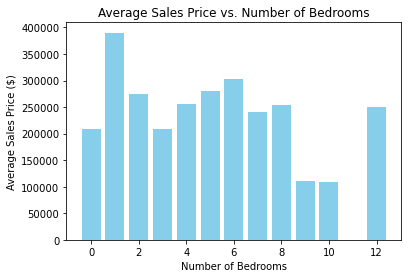

In [10]:
avg_prices = merged_df_clean.groupby('Bedrooms')['SaleAmount'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Number of Bedrooms')

# Show the chart
plt.show()

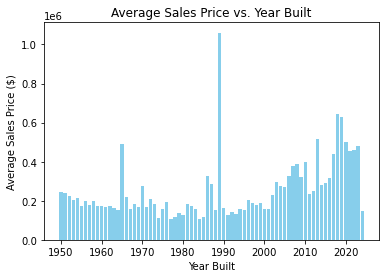

In [11]:
avg_prices = merged_df_clean.groupby('YearBuilt')['SaleAmount'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Year Built')

# Show the chart
plt.show()

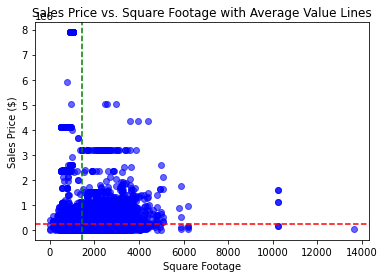

In [12]:
x = merged_df_clean['SquareFootageFinishedLiving']
y = merged_df_clean['SaleAmount']

plt.scatter(x, y, color='blue', alpha=0.6)

x_avg = np.mean(x)
y_avg = np.mean(y)

plt.axhline(y_avg, color='red', linestyle='--', label=f'Avg Y: {y_avg:.2f}')

# Optionally, add a vertical line at the average x-value
plt.axvline(x_avg, color='green', linestyle='--', label=f'Avg X: {x_avg:.2f}')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Sales Price ($)')
plt.title('Sales Price vs. Square Footage with Average Value Lines')

# Show the plot
plt.show()